<a href="https://colab.research.google.com/github/Anna9288/projects/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BRAIN STROKE PREDICTION





According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

LOADING LIBRARIES & DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/archive(14).zip")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


CHECKING THE DATA

In [2]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
df.shape

(5110, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

DATA PREPROCESSING

In [10]:
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


This dataset comprises of 5110 rows and 12 columns.It have 201 missing values whis is seen only in bmi columns.It have four object datatypes,three float data types and four integer datatypes

FILLING MISSING VALUES

In [11]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [12]:
print(df.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


NUMERICAL DATA ANALYSIS

In [13]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [14]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [15]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [16]:
df['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [17]:
import seaborn as sns
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<AxesSubplot:>

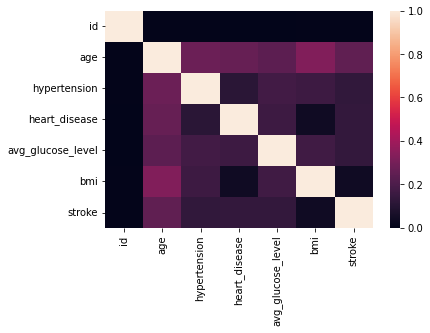

In [18]:
sns.heatmap(df.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

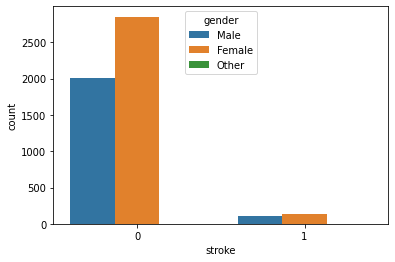

In [19]:
sns.countplot('stroke',data=df,hue='gender')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

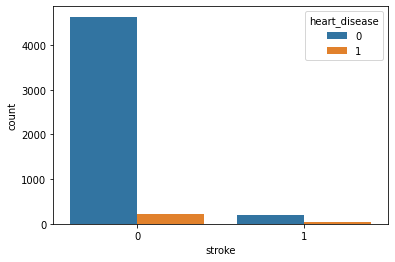

In [20]:
sns.countplot('stroke',data=df,hue='heart_disease')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

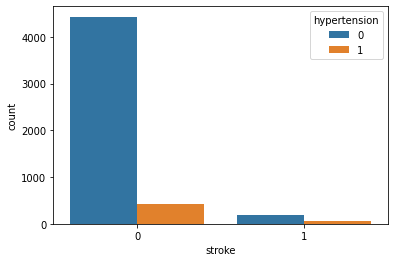

In [21]:
sns.countplot('stroke',data=df,hue='hypertension')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

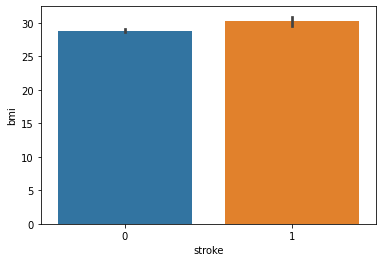

In [22]:
sns.barplot('stroke','bmi',data=df)

CATEGORICAL DATA ANALYSIS

In [23]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [24]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

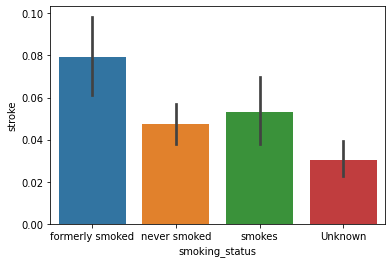

In [25]:
sns.barplot('smoking_status','stroke',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='stroke'>

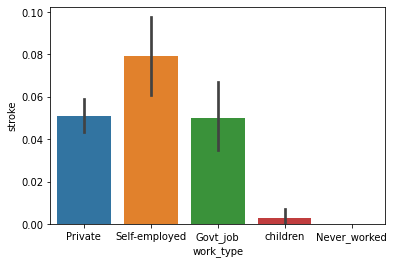

In [26]:
sns.barplot('work_type','stroke',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

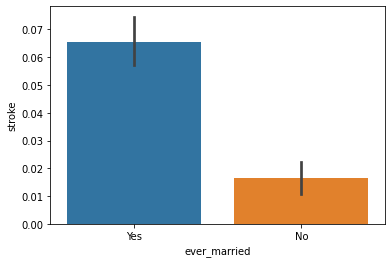

In [27]:
sns.barplot('ever_married','stroke',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

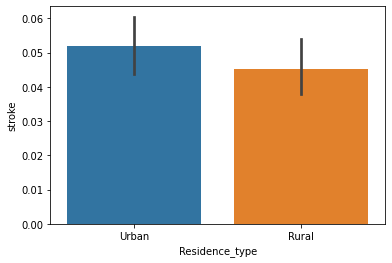

In [28]:
sns.barplot('Residence_type','stroke',data=df)

FINDING OUTLIERS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='age'>

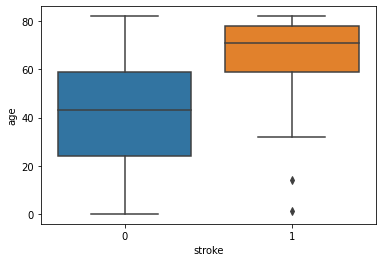

In [29]:
sns.boxplot('stroke','age',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

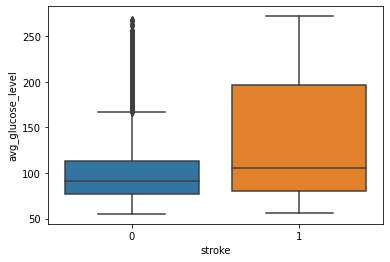

In [30]:
sns.boxplot('stroke','avg_glucose_level',data=df)

Here we dont remove these outliers as they are legitimate observation which is natural part of the population.

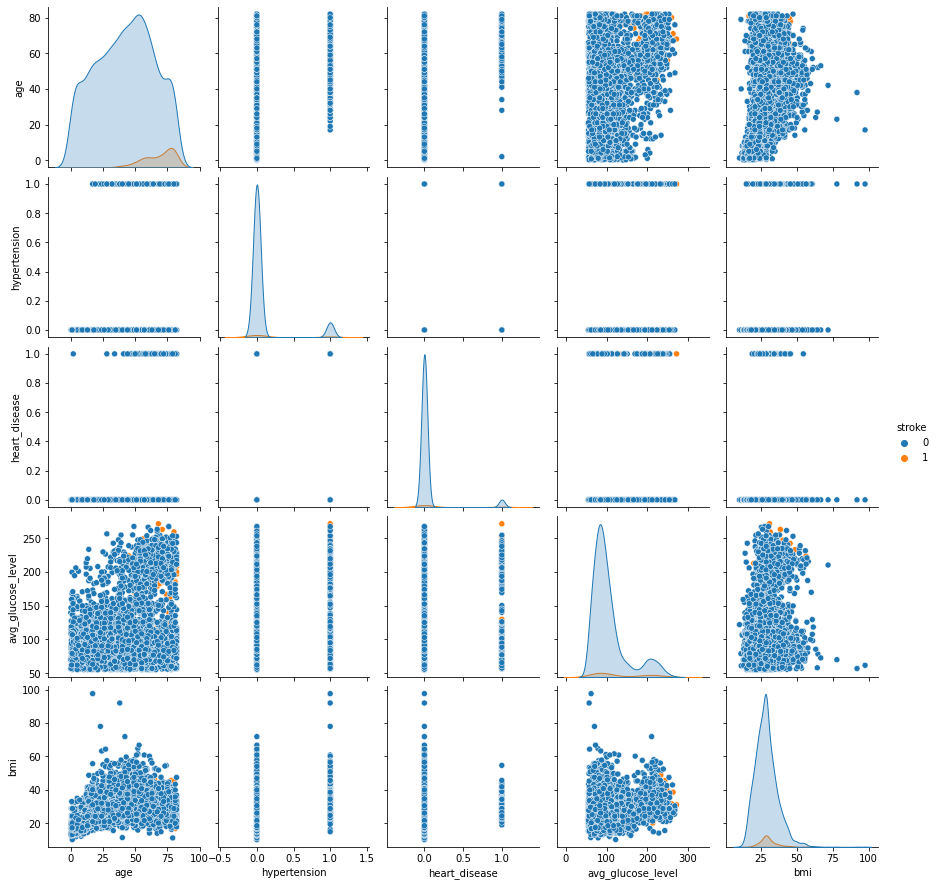

In [31]:
sns.pairplot(df.drop(['id'],axis=1),hue='stroke')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

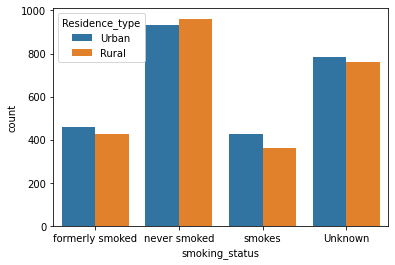

In [32]:
sns.countplot('smoking_status',data=df,hue='Residence_type')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

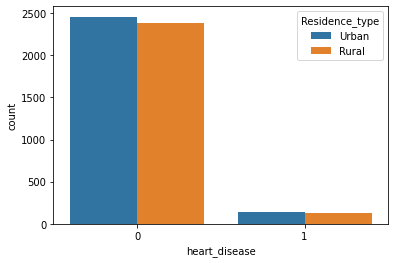

In [33]:
sns.countplot('heart_disease',data=df,hue='Residence_type')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

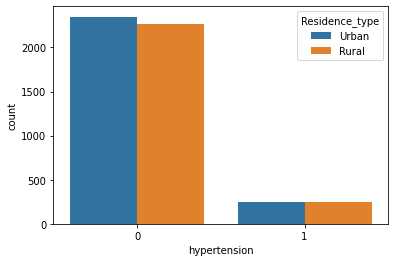

In [34]:
sns.countplot('hypertension',data=df,hue='Residence_type')

FEATURE SELECTION


Label encoding the categorical data and removing the features that does not affect the output feature.For that we use SelectKBest and chi2 from feature selection.

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
gender=le.fit_transform(df['gender'])
ever_married=le.fit_transform(df['ever_married'])
Residence_type=le.fit_transform(df['Residence_type'])
smoking_status=le.fit_transform(df['smoking_status'])
work_type=le.fit_transform(df['work_type'])
ls=list(zip(gender,ever_married,Residence_type,smoking_status,work_type,df['avg_glucose_level'],df['bmi'],df['hypertension'],df['heart_disease'],df['age'],df['stroke']))
df1=pd.DataFrame(ls)
df1.columns=['gender','married','residence','smoking','work','glucose','bmi','hytension','heart_disease','age','stroke']
df1

,gender,married,residence,smoking,work,glucose,bmi,hytension,heart_disease,age,stroke
0,1,1,1,1,2,228.69,36.600000,0,1,67.0,1
1,0,1,0,2,3,202.21,28.893237,0,0,61.0,1
2,1,1,0,2,2,105.92,32.500000,0,1,80.0,1
3,0,1,1,3,2,171.23,34.400000,0,0,49.0,1
4,0,1,0,2,3,174.12,24.000000,1,0,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,1,2,2,83.75,28.893237,1,0,80.0,0
5106,0,1,1,2,3,125.20,40.000000,0,0,81.0,0
5107,0,1,0,2,3,82.99,30.600000,0,0,35.0,0
5108,1,1,0,1,2,166.29,25.600000,0,0,51.0,0


In [36]:
x1=df1.iloc[:,:-1]
y1=df1['stroke']

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
rank_feature=SelectKBest(score_func=chi2,k=10)
feature=rank_feature.fit(x1,y1)
ordered_feature=pd.DataFrame({'feature':x1.columns,'scores':feature.scores_})
ordered_feature.sort_values('scores',ascending=False)

,feature,scores
9,age,3635.226911
5,glucose,1718.285446
8,heart_disease,87.987436
7,hytension,75.449498
1,married,20.622787
6,bmi,15.894122
3,smoking,3.369423
4,work,2.925901
2,residence,0.600717
0,gender,0.239001


<AxesSubplot:xlabel='feature', ylabel='scores'>

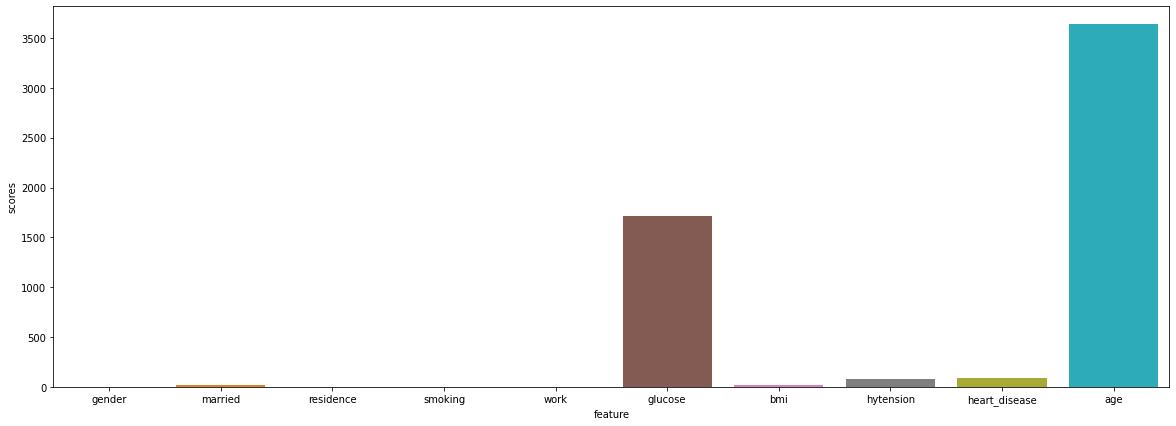

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
sns.barplot(y='scores',x='feature',data=ordered_feature)

We used labelencoder to get hierarchial numerical values and get_dummies are used to get equal value of numerical data

In [39]:
dum=pd.get_dummies(df[['ever_married']])
dum

,ever_married_No,ever_married_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5105,0,1
5106,0,1
5107,0,1
5108,0,1




Now we join the encoded dataframe and old dataframe.

In [40]:
df2=pd.concat([df,dum],axis=1)
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_No,ever_married_Yes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,0,1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,0,1
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,0,1
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,0,1


Now we drop unimportant and duplicate columns from newly formed dataframe.

In [41]:
df2.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status'],axis=1,inplace=True)
df2

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes
0,67.0,0,1,228.69,36.600000,1,0,1
1,61.0,0,0,202.21,28.893237,1,0,1
2,80.0,0,1,105.92,32.500000,1,0,1
3,49.0,0,0,171.23,34.400000,1,0,1
4,79.0,1,0,174.12,24.000000,1,0,1
...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,0,1
5106,81.0,0,0,125.20,40.000000,0,0,1
5107,35.0,0,0,82.99,30.600000,0,0,1
5108,51.0,0,0,166.29,25.600000,0,0,1


Now we check all the datatypes and missing values to ensure it's a clean data

In [42]:
df2.dtypes

age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
ever_married_No        uint8
ever_married_Yes       uint8
dtype: object

In [43]:
print(df2.isna().sum())

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
ever_married_No      0
ever_married_Yes     0
dtype: int64


In [44]:
df2.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'ever_married_No', 'ever_married_Yes'],
      dtype='object')

Now we put input and output features into variable x and y data

In [45]:
x=df1.drop(['stroke'],axis=1).iloc[:,:]
y=df1['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

CONVERTING DATASET INTO TRAINING AND TESTING DATA

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,gender,married,residence,smoking,work,glucose,bmi,hytension,heart_disease,age
3897,1,0,0,0,4,90.42,16.2,0,0,4.00
576,1,0,1,3,2,207.58,22.8,0,0,29.00
4013,1,1,0,2,2,91.28,26.5,1,0,44.00
4536,0,1,1,0,2,150.74,40.3,1,0,68.00
1180,0,1,0,1,2,82.57,36.0,0,0,62.00
...,...,...,...,...,...,...,...,...,...,...
4426,1,1,0,2,0,88.00,30.6,0,0,43.00
466,0,1,0,3,2,170.05,60.2,1,0,61.00
3092,0,0,1,0,4,97.28,17.8,0,0,1.16
3772,1,1,0,1,3,196.08,31.0,0,0,80.00


HANDLING IMBALENCED DATSET

In [72]:
y_train.value_counts()

0    3417
1     160
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

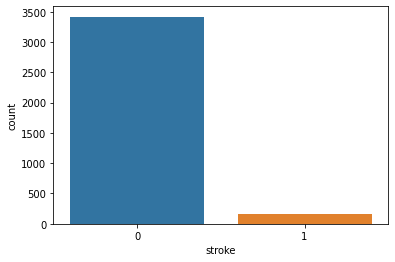

In [73]:
sns.countplot(x=y_train,data=df2)

In [80]:
from scipy.sparse.construct import random
from imblearn.over_sampling import SMOTE
from collections import Counter
over=SMOTE(random_state=42)
over_xtrain,over_ytrain=over.fit_resample(x_train,y_train)
print(Counter(y_train))
print(Counter(over_ytrain))

Counter({0: 3417, 1: 160})
Counter({0: 3417, 1: 3417})


STANDARDIZING  DATA

In [75]:
#from sklearn.preprocessing import StandardScaler
#scale=StandardScaler()
#scale.fit(x_train)
#x_test=scale.transform(x_test)
#x_train=scale.transform(x_train)
#x_train

array([[ 1.18418048, -1.37708252, -1.01890953, ..., -0.31719928,
        -0.23946931, -1.7467638 ],
       [ 1.18418048, -1.37708252,  0.9814414 , ..., -0.31719928,
        -0.23946931, -0.63635252],
       [ 1.18418048,  0.72617289, -1.01890953, ...,  3.15259225,
        -0.23946931,  0.02989425],
       ...,
       [-0.84446587, -1.37708252,  0.9814414 , ..., -0.31719928,
        -0.23946931, -1.87290652],
       [ 1.18418048,  0.72617289, -1.01890953, ..., -0.31719928,
        -0.23946931,  1.62888649],
       [-0.84446587,  0.72617289, -1.01890953, ..., -0.31719928,
        -0.23946931,  0.11872715]])

CREATING THE MODEL

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.
random=RandomForestClassifier()
neigh=KNeighborsClassifier(n_neighbors=3)
svc=SVC()
linear=LogisticRegression()
algorithm =[random,neigh,svc,linear]

PERFORMANCE OF THE MODEL

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in algorithm:
  print(i)
  i.fit(over_xtrain,over_ytrain)
  y_pred=i.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1444
           1       0.13      0.07      0.09        89

    accuracy                           0.92      1533
   macro avg       0.54      0.52      0.52      1533
weighted avg       0.90      0.92      0.91      1533

[[1405   39]
 [  83    6]]
0.9204174820613177
KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1444
           1       0.15      0.31      0.20        89

    accuracy                           0.85      1533
   macro avg       0.55      0.60      0.56      1533
weighted avg       0.91      0.85      0.88      1533

[[1279  165]
 [  61   28]]
0.852576647097195
SVC()
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1444
           1       0.14      0.51      0.22        89

    accuracy            

Hyper Tuning

In [115]:
clas1=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
para={'criterion':['entropy','gini'],'n_estimators':[5,6,7,10,12,13,15]}
clf=GridSearchCV(clas1,para,cv=10,scoring='recall')
clf.fit(over_xtrain,over_ytrain)



GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': [5, 6, 7, 10, 12, 13, 15]},
             scoring='recall')

In [116]:
print(clf.best_params_)

{'criterion': 'gini', 'n_estimators': 15}


In [121]:
clas2=RandomForestClassifier(criterion='entropy',n_estimators=15)
clas2.fit(over_xtrain,over_ytrain)
y_predict=clas2.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
score1=accuracy_score(y_predict,y_test)
score1

0.9223744292237442

In [123]:
report2=classification_report(y_predict,y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1479
           1       0.13      0.22      0.17        54

    accuracy                           0.92      1533
   macro avg       0.55      0.59      0.56      1533
weighted avg       0.94      0.92      0.93      1533



In [124]:
print(confusion_matrix(y_predict,y_test))

[[1402   77]
 [  42   12]]


We have visualised ,analysed and done machine learning of dataset using random forest algorithm.This is a good model since the accuracy score is above 90%.